## Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries<br>
b. Upload / access the dataset<br>
c. Encoder converts it into latent representation<br>
d. Decoder networks convert it back to the original input<br>
e. Compile the models with Optimizer, Loss, and Evaluation Metrics<br>


In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [34]:
path = 'dataset/ecg-csv/ecg-csv/ecg.csv'
df = pd.read_csv(path,header=None)

In [35]:
df = df.drop(140, axis=1) 
df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [36]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
df = StandardScaler.fit_transform(df)

In [37]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

In [38]:
print(x_train.shape[1])
print(x_test.shape[1])
type(x_train)

140
140


numpy.ndarray

In [39]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [40]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder
])

In [41]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [42]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=10,
    batch_size = 30,
    shuffle=True
)

Epoch 1/10
134/134 [==============================] - 4s 9ms/step - loss: 0.6704 - val_loss: 0.3898
Epoch 2/10
134/134 [==============================] - 1s 6ms/step - loss: 0.3183 - val_loss: 0.2976
Epoch 3/10
134/134 [==============================] - 1s 6ms/step - loss: 0.2725 - val_loss: 0.2760
Epoch 4/10
134/134 [==============================] - 1s 6ms/step - loss: 0.2534 - val_loss: 0.2611
Epoch 5/10
134/134 [==============================] - 1s 6ms/step - loss: 0.2399 - val_loss: 0.2495
Epoch 6/10
134/134 [==============================] - 1s 6ms/step - loss: 0.2255 - val_loss: 0.2337
Epoch 7/10
134/134 [==============================] - 1s 6ms/step - loss: 0.2075 - val_loss: 0.2184
Epoch 8/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1922 - val_loss: 0.2064
Epoch 9/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1812 - val_loss: 0.1983
Epoch 10/10
134/134 [==============================] - 1s 6ms/step - loss: 0.1745 - val_loss: 0.1961

<Axes: >

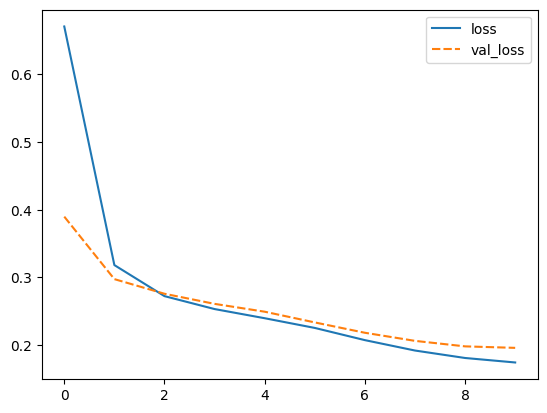

In [43]:
import seaborn as sns
sns.lineplot(model.history.history)

In [44]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

32/32 [==============================] - 0s 3ms/step


In [45]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

0.4894422503744985

In [46]:
anomalies = mse > threshold

In [47]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


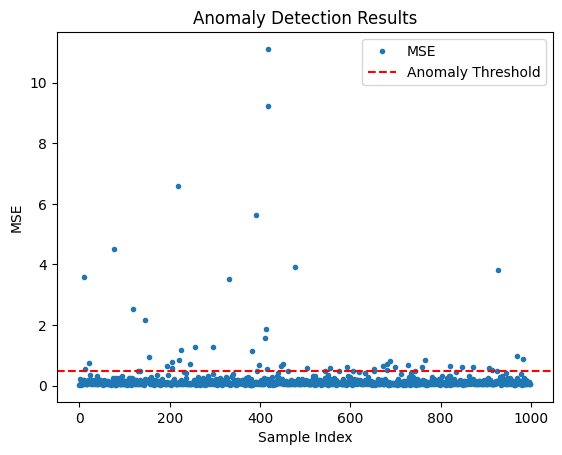

In [48]:
#Plot the anomalies
import matplotlib.pyplot as plot

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

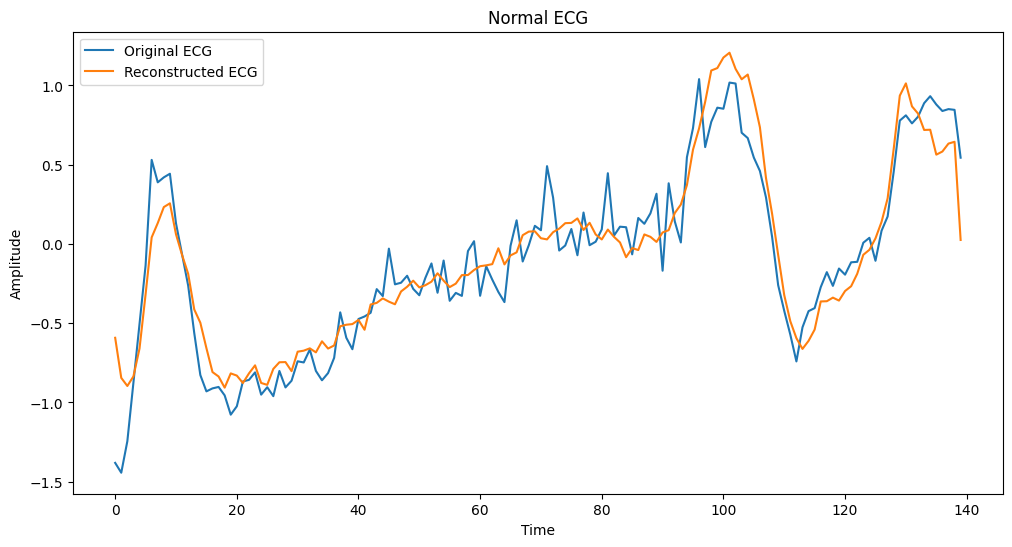

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

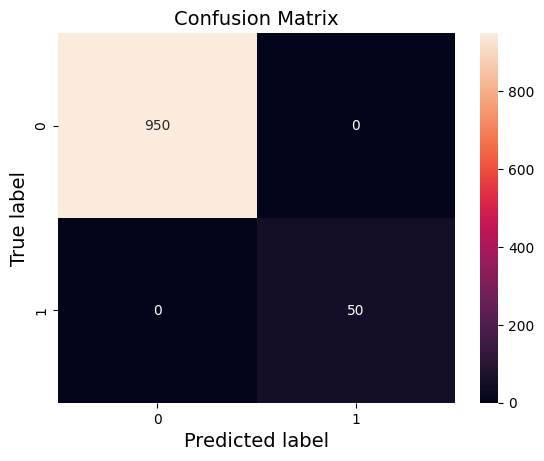

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()